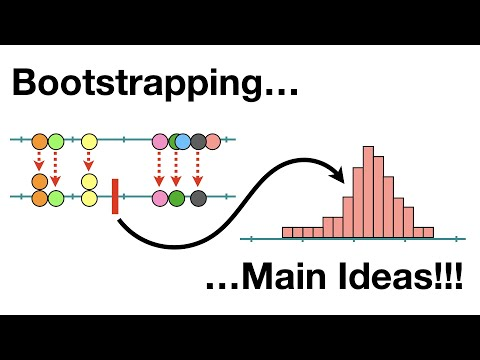

In [1]:
from IPython.display import YouTubeVideo
YouTubeVideo('Xz0x-8-cgaQ', width=800, height=500)

In [4]:
#1.the difference between the "standard error of the mean" and the "standard deviation" of the original data
#Standard Deviation (SD): This measures the spread of individual data points in the original sample. 
#It tells you how much variation or dispersion exists in the dataset itself.

#Standard Error of the Mean (SEM): This quantifies how much the sample mean would vary if you repeated 
#the sampling multiple times. It represents the variability of the mean estimate across different samples. 
#The SEM decreases as sample size increases, as it reflects how precisely the sample mean estimates the population mean.

In [6]:
#2.How can we use the "standard error of the mean" to create a 95% confidence interval which "covers 95% of the bootstrapped sample means"?
#First,Calculate the sample mean (ˉy) and the SEM.
#Second,Multiply the SEM(standard error of the mean) by 1.96 (the z-score for 95% confidence).
#At last, Add and subtract this value from the sample mean to get the confidence interval bounds:
#[sample mean-1.96*SEM, sample mean+1.96*SEM]

In [7]:
#3.How do we create a 95% bootstrapped confidence interval using the bootstrapped means
#(without using their standard deviation to estimate the standard error of the mean)?
#1.Resample the original data many times (e.g., 1000+), calculating the mean of each resample to get a distribution of bootstrapped means.
#2.Sort the bootstrapped means. Find the 2.5th percentile and 97.5th percentile of the sorted bootstrapped means. 
#These values form the lower and upper bounds of the confidence interval. And then all middle 95% data can be involved.

In [12]:
4.# 95% bootstrap confidence interval for population mean
import numpy as np
import scipy.stats as stats

# Sample data (replace with your own sample)
sample = np.random.normal(loc=50, scale=10, size=100)  # Example sample data

# Number of bootstrap samples
n_bootstraps = 5000

# Bootstrap function for population mean
def bootstrap_mean(sample, n_bootstraps):
    means = []
    # Resample the data and compute the mean for each bootstrap sample
    for _ in range(n_bootstraps):
        bootstrap_sample = np.random.choice(sample, size=len(sample), replace=True)
        means.append(np.mean(bootstrap_sample))
    return means

# Generate bootstrap samples for the mean
boot_means = bootstrap_mean(sample, n_bootstraps)

# Calculate 95% confidence interval
ci_lower, ci_upper = np.percentile(boot_means, [2.5, 97.5])
print(f"95% Bootstrap Confidence Interval for Mean: [{ci_lower}, {ci_upper}]")


95% Bootstrap Confidence Interval for Mean: [48.9387068540178, 52.916829410543706]


In [11]:
4.# 95% bootstrap confidence interval for population medium
import numpy as np
import scipy.stats as stats

# Sample data (replace with your own sample)
sample = np.random.normal(loc=50, scale=10, size=100)  # Example sample data

# Number of bootstrap samples
n_bootstraps = 5000

# Bootstrap function for population median
def bootstrap_median(sample, n_bootstraps):
    medians = []
    for _ in range(n_bootstraps):
        bootstrap_sample = np.random.choice(sample, size=len(sample), replace=True)
        medians.append(np.median(bootstrap_sample))
    return medians

# Generate bootstrap samples for the mean
boot_means = bootstrap_mean(sample, n_bootstraps)

# Calculate 95% confidence interval
ci_lower, ci_upper = np.percentile(boot_means, [2.5, 97.5])
print(f"95% Bootstrap Confidence Interval for Mean: [{ci_lower}, {ci_upper}]")

95% Bootstrap Confidence Interval for Mean: [48.096590940478904, 52.21467969678236]


In [13]:
#Here is the chatbot link for pre-lec HW: https://chatgpt.com/share/66fd730a-a5c8-800b-af81-30b7e2b541bf

In [15]:
#5. Why do we need to distinguish between the role of the popualation parameter and the sample sample statistic when it comes to confidence intervals? 
#[1] Population Parameter: This is the true and accurate, but usually unknown and nearly impossible to measure,
#value we're trying to estimate for the whole population (e.g., the actual mean or proportion).
#[2] Sample Statistic: This is a calculated value (e.g., sample mean or proportion) based on the sample data we have,
#which serves as an estimate of the population parameter.

In [16]:
#6. conservation on bootstrapping
#1.What is Bootstrapping?
#Bootstrapping is a method where you repeatedly take random samples from your existing data, allowing duplicates, 
#to estimate what the overall population is like.

#2.Main Purpose of Bootstrapping
#The main goal is to figure out the likely spread or accuracy of a sample statistic (like an average)
#without assuming anything about the population's original pattern.

#3.How to Use Bootstrapping for a Hypothesized Average
#[1]Take multiple random samples from your data, making sure some values repeat.
#[2]Calculate the average of each new sample.
#[3]Compare these averages to your guessed average. If your guess falls within the normal range of these averages, 
#it’s probably reasonable; if not, it might be wrong.

In [3]:
#7.Why does a confidence interval overlapping zero "fail to reject the null hypothesis" when the observed sample mean statistic itself is not zero? Alternatively, what would lead to the opposite conclusion in this context; namely, instead choosing "to reject the null hypothesis"? 

#A confidence interval that overlaps zero means there is a plausible chance that the true effect (on average) could be zero. This uncertainty prevents us
#from confidently concluding that the drug has an effect, even if the sample mean is not zero.
#In hypothesis testing, the null hypothesis states that there is no effect, and because zero is
#within the range of possible values, we "fail to reject" this null hypothesis.

#To reject the null hypothesis, the confidence interval would need to exclude zero. This would indicate that
#all plausible values of the true effect are either entirely positive or negative, meaning we have enough evidence to conclude the drug has 
#an effect (either beneficial or harmful).

In [ ]:
#8.vaccine data analysis
Data Visualization
Create a visual comparison of initial and final health scores to see if there are obvious changes. For example:

A bar chart comparing initial and final scores for each patient.
A box plot or histogram showing the distribution of the score changes.
3. Quantitative Analysis
Methodology
You can use bootstrapping to resample the data multiple times to estimate the effect of the vaccine. This will help generate confidence intervals to assess whether the health score improvement is statistically significant.

Code Explanation
Using Python (pandas, matplotlib, seaborn, and possibly numpy for bootstrapping), you will:

Compute the difference between initial and final health scores.
Bootstrap the sample differences (with replacement) to generate a distribution.
Calculate a 95% confidence interval from these bootstrap samples.
4. Findings and Discussion
Analyze whether the confidence interval of the bootstrapped differences includes zero:

If zero is within the interval, this supports the null hypothesis (no significant effect).
If zero is not within the interval, reject the null hypothesis (the vaccine has a significant effect).



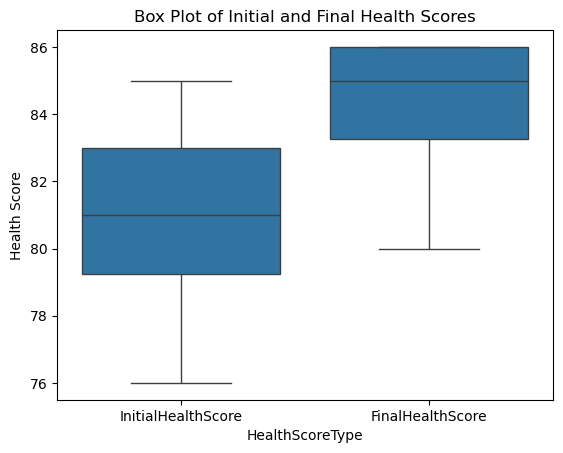

In [4]:
# Importing necessary libraries
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Creating the DataFrame
data = {
    'PatientID': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10],
    'Age': [45, 34, 29, 52, 37, 41, 33, 48, 26, 39],
    'Gender': ['M', 'F', 'M', 'F', 'M', 'F', 'M', 'F', 'M', 'F'],
    'InitialHealthScore': [84, 78, 83, 81, 81, 80, 79, 85, 76, 83],
    'FinalHealthScore': [86, 86, 80, 86, 84, 86, 86, 82, 83, 84]
}

df = pd.DataFrame(data)

# Melt the DataFrame to have Initial and Final Health Scores in a single column
df_melted = df.melt(id_vars=["PatientID"], value_vars=["InitialHealthScore", "FinalHealthScore"], 
                    var_name="HealthScoreType", value_name="HealthScore")

# Plotting the box plot using seaborn
sns.boxplot(x="HealthScoreType", y="HealthScore", data=df_melted)

# Adding plot labels
plt.title('Box Plot of Initial and Final Health Scores')
plt.ylabel('Health Score')

# Show the plot
plt.show()


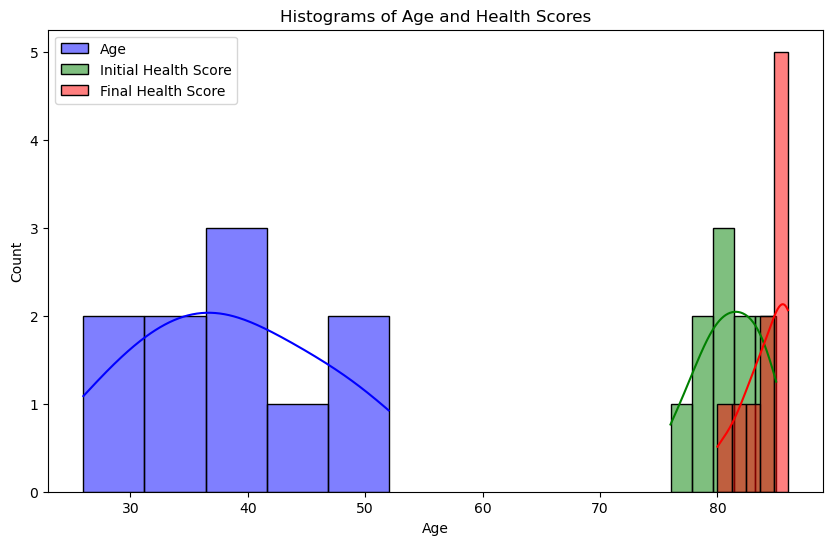

In [5]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Data in dictionary form
data = {
    'PatientID': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10],
    'Age': [45, 34, 29, 52, 37, 41, 33, 48, 26, 39],
    'Gender': ['M', 'F', 'M', 'F', 'M', 'F', 'M', 'F', 'M', 'F'],
    'InitialHealthScore': [84, 78, 83, 81, 81, 80, 79, 85, 76, 83],
    'FinalHealthScore': [86, 86, 80, 86, 84, 86, 86, 82, 83, 84]
}

# Create a DataFrame
df = pd.DataFrame(data)

# Plot histograms for Age, InitialHealthScore, and FinalHealthScore
plt.figure(figsize=(10, 6))
sns.histplot(df['Age'], kde=True, color='blue', label='Age')
sns.histplot(df['InitialHealthScore'], kde=True, color='green', label='Initial Health Score')
sns.histplot(df['FinalHealthScore'], kde=True, color='red', label='Final Health Score')

plt.legend()
plt.title('Histograms of Age and Health Scores')
plt.show()


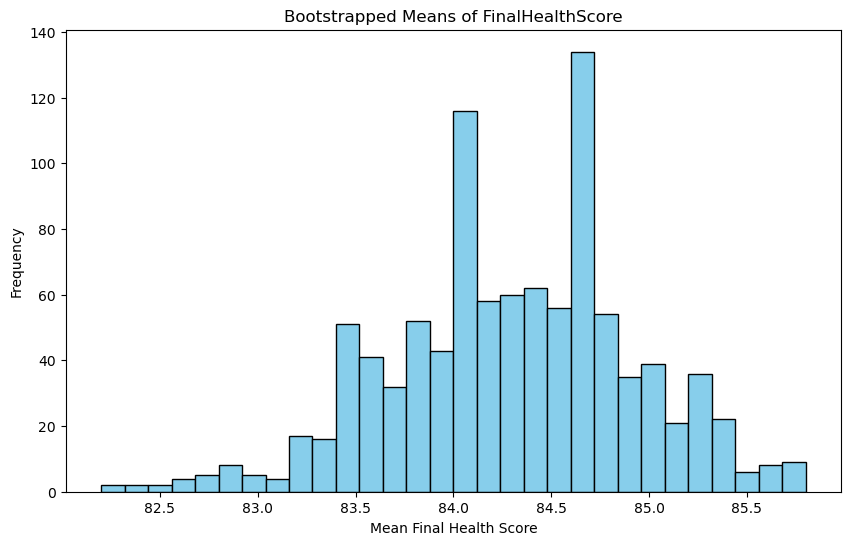

95% Confidence Interval: [83.  85.4]


In [6]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Data in dictionary form
data = {
    'PatientID': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10],
    'Age': [45, 34, 29, 52, 37, 41, 33, 48, 26, 39],
    'Gender': ['M', 'F', 'M', 'F', 'M', 'F', 'M', 'F', 'M', 'F'],
    'InitialHealthScore': [84, 78, 83, 81, 81, 80, 79, 85, 76, 83],
    'FinalHealthScore': [86, 86, 80, 86, 84, 86, 86, 82, 83, 84]
}

# Create a DataFrame
df = pd.DataFrame(data)

# Function to perform bootstrapping
def bootstrap(data, n_iterations, sample_size):
    boot_means = []
    for i in range(n_iterations):
        sample = np.random.choice(data, size=sample_size, replace=True)  # Bootstrap sampling
        boot_means.append(np.mean(sample))  # Store mean of each sample
    return boot_means

# Bootstrapping
n_iterations = 1000
sample_size = len(df['FinalHealthScore'])
boot_means = bootstrap(df['FinalHealthScore'], n_iterations, sample_size)

# Plotting the bootstrap distribution of means
plt.figure(figsize=(10, 6))
plt.hist(boot_means, bins=30, color='skyblue', edgecolor='black')
plt.title('Bootstrapped Means of FinalHealthScore')
plt.xlabel('Mean Final Health Score')
plt.ylabel('Frequency')
plt.show()

# Display confidence intervals (95%)
conf_int = np.percentile(boot_means, [2.5, 97.5])
print(f"95% Confidence Interval: {conf_int}")
